## Lab 2: Probability, Distributions, and Statistical Questions

#### Ciara West, PHYS 434A

In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

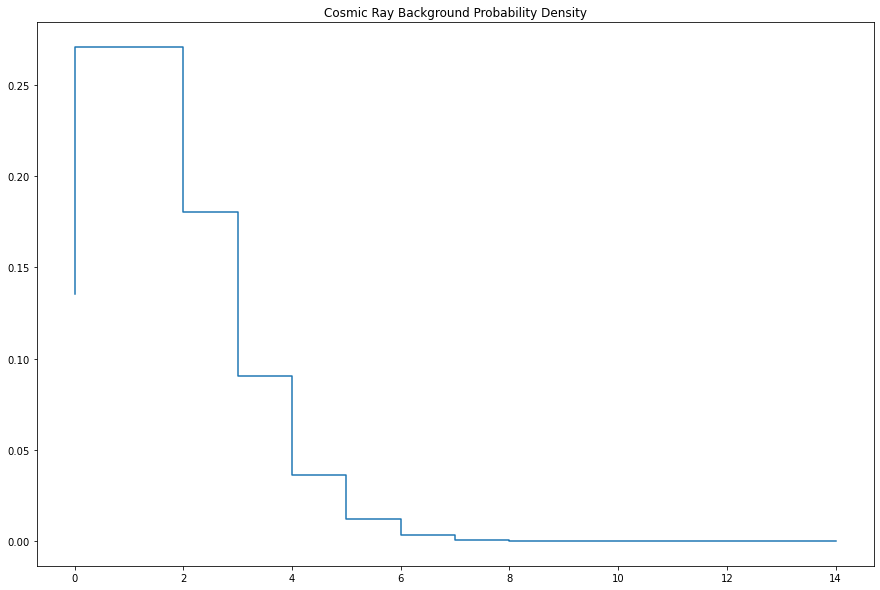

In [86]:
# average cosmic ray background
crb = 2
# average number of gamma rays
Y = 9

x_1=[]
avg_crb=[]
for i in range(0, 15):
    x_1.append(i)
    avg_crb.append(stats.poisson.pmf(i, crb))
    
plt.step(x_1, avg_crb)
plt.title('Cosmic Ray Background Probability Density')
plt.show()

In [87]:
def mult_conv(pdf, n):
    conv = np.convolve(pdf, pdf)
    for i in range(0, n-2):
        conv = np.convolve(conv, pdf)
    return(conv)

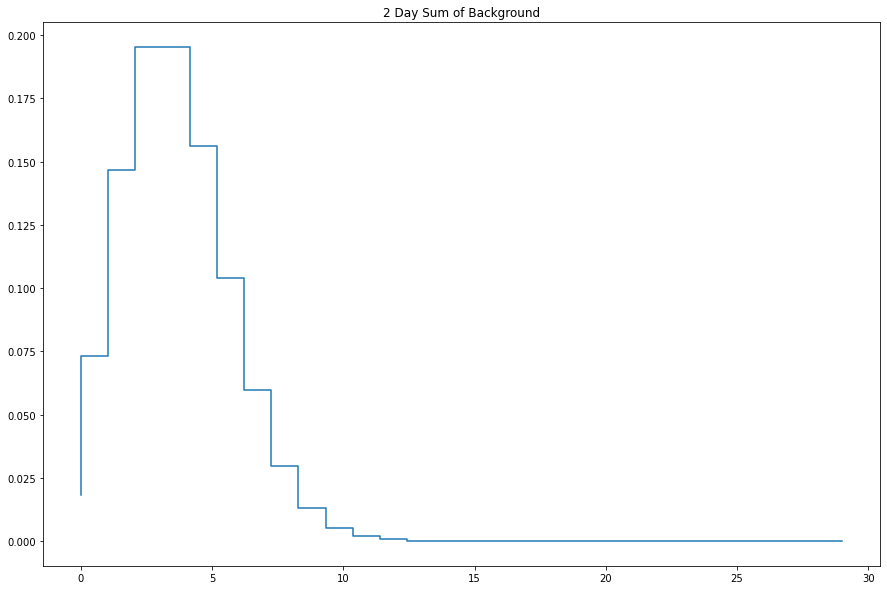

In [88]:
sum_bg = mult_conv(avg_crb, 1)
x_2 = np.linspace(0, len(sum_bg), len(sum_bg))
plt.step(x_2, sum_bg)
plt.title('2 Day Sum of Background')
plt.show()

The distribution has remained Poisson distributed, but as we sum over more days the peak appears to move away from zero. This is because a Poisson distribution can only have positive values, so as we sum over more days peak must increase to include the additional probabilities above zero. 

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

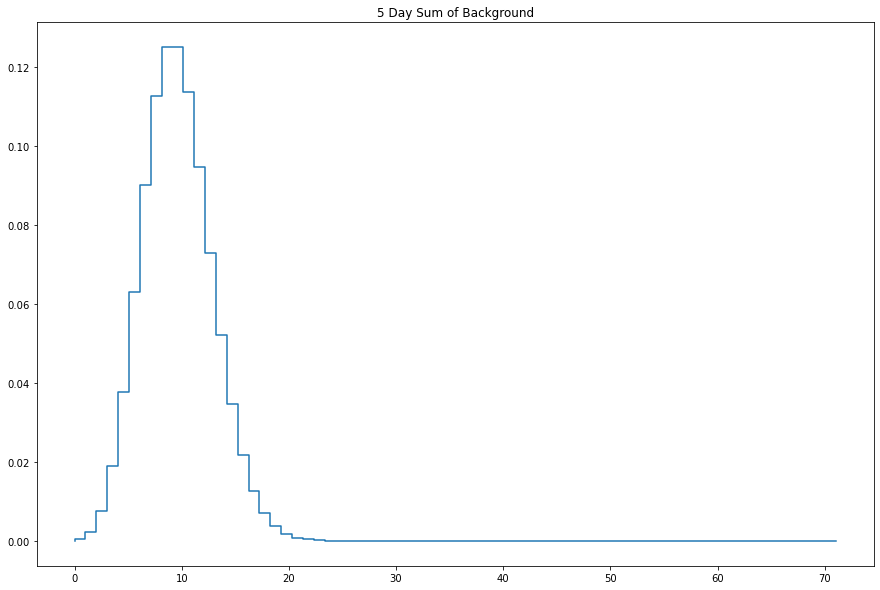

In [89]:
sum_5 = mult_conv(avg_crb, 5)
size = len(sum_5)
x_5 = np.linspace(0, size, size)
plt.step(x_5, sum_5)
plt.title('5 Day Sum of Background')
plt.show()   

The distribution after 5 days remains Poisson. This makes sense because 5 days still remains a small step size for the convolution integral, meaning the distribution is still closer to discrete than continuous. The right tail also appears to be skewed, which we will see on a semilog plot too. 

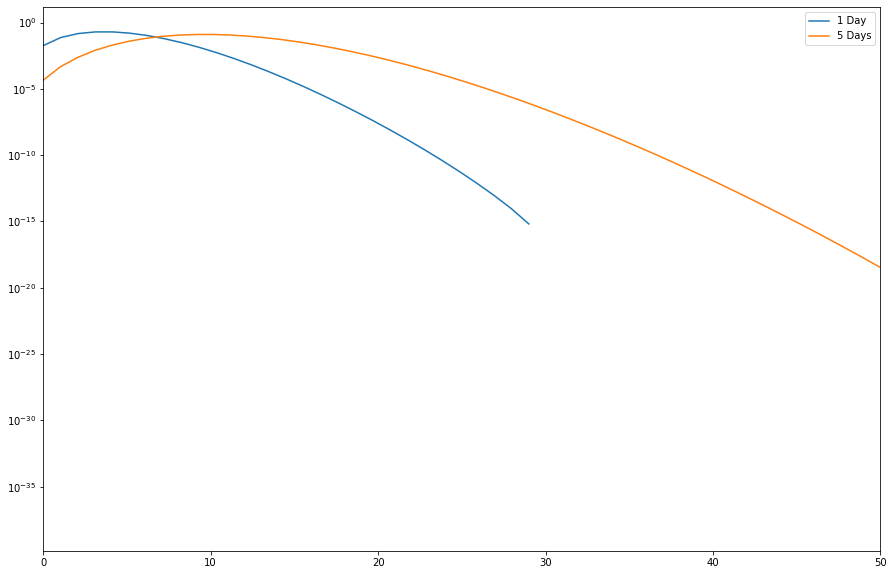

In [100]:
plt.semilogy(np.linspace(0, len(sum_bg), len(sum_bg)), sum_bg, label = '1 Day')
plt.semilogy(np.linspace(0, len(sum_5), len(sum_5)), sum_5, label = '5 Days')
plt.xlim([0, 50])
plt.legend()
plt.show()

The semilog plot for 5 days compared to the original background is not much different. The original is a Poisson distribution, so we can see that the sum of 5 days has not changed the distribution much, only a little less skewed. 

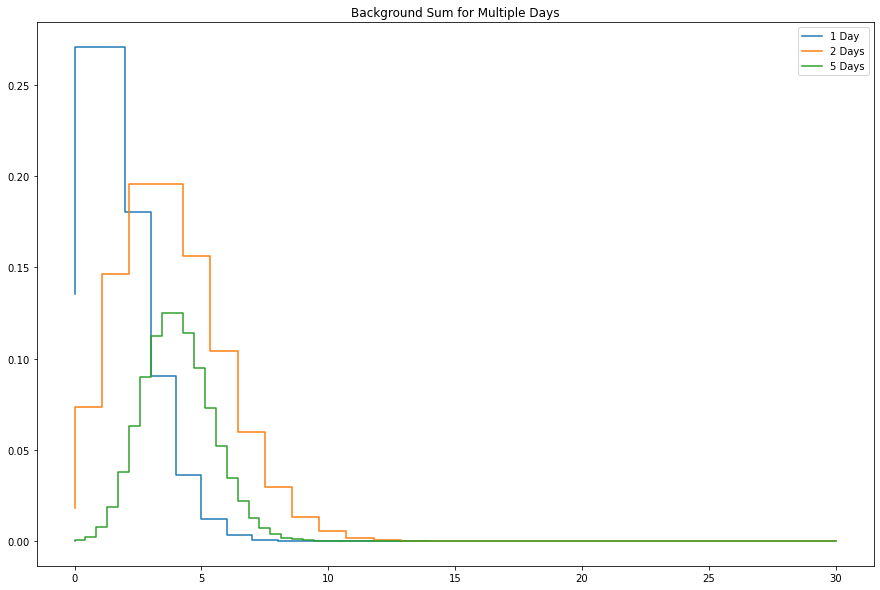

In [71]:
plt.step(x_1, avg_crb, label = f'1 Day')
plt.step(x_2, sum_bg, label = f'2 Days')
plt.step(x_5, sum_5, label = f'5 Days')
plt.legend()
plt.title('Background Sum for Multiple Days')
plt.show()

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

In [7]:
sum_8 = mult_conv(avg_crb, 8)
sum_16 = mult_conv(avg_crb, 16)
sum_30 = mult_conv(avg_crb, 30)
sum_100 = mult_conv(avg_crb, 100)

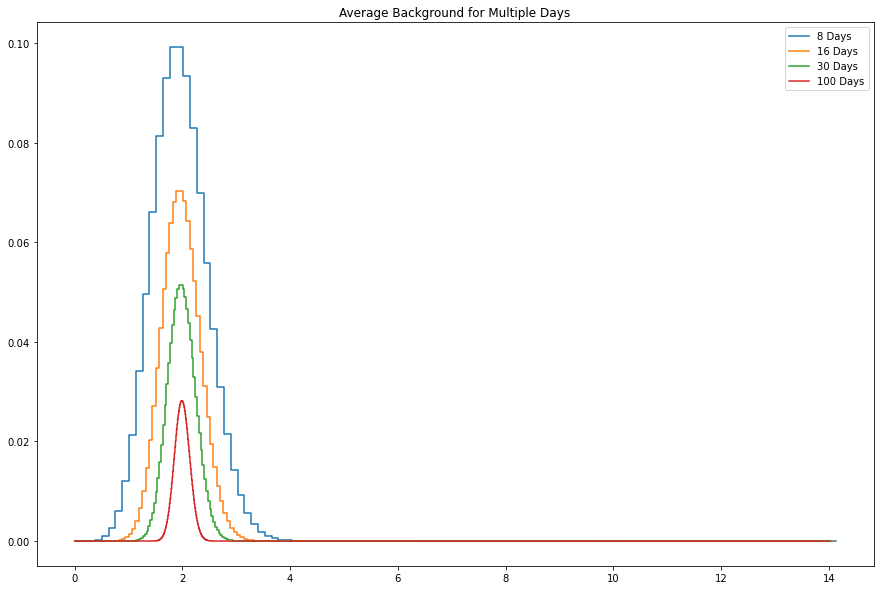

In [73]:
plt.step(np.linspace(0, len(sum_8), len(sum_8))/8, sum_8, label = '8 Days')
plt.step(np.linspace(0, len(sum_16), len(sum_16))/16, sum_16, label = '16 Days')
plt.step(np.linspace(0, len(sum_30), len(sum_30))/30, sum_30, label = '30 Days')
plt.step(np.linspace(0, len(sum_100), len(sum_100))/100, sum_100, label = '100 Days')
plt.legend()
plt.title('Average Background for Multiple Days')
plt.show()

As we approach the average of 100 days it is clear that the distribution has become smoother, and it appears to approach a gaussian shape. We will explore this more after plotting these averages on a semilog plot.

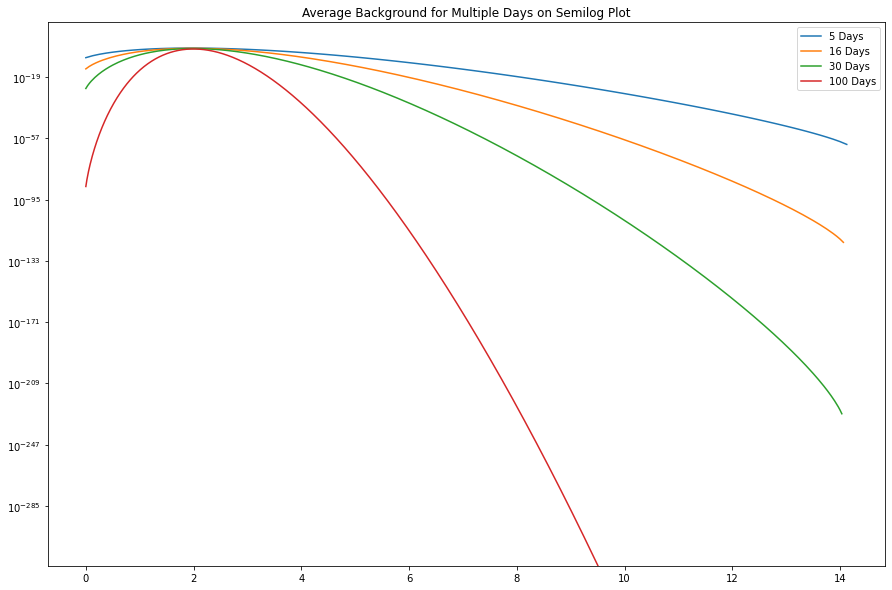

In [9]:
plt.semilogy(np.linspace(0, len(sum_8), len(sum_8))/8, sum_8, label = '5 Days')
plt.semilogy(np.linspace(0, len(sum_16), len(sum_16))/16, sum_16, label = '16 Days')
plt.semilogy(np.linspace(0, len(sum_30), len(sum_30))/30, sum_30, label = '30 Days')
plt.semilogy(np.linspace(0, len(sum_100), len(sum_100))/100, sum_100, label = '100 Days')
plt.legend()
plt.title('Average Background for Multiple Days on Semilog Plot')
plt.show()

If the averaged distribution were Gaussian we would expect a parabola shape on the semilog plot. When we average over 100 days the plot still appears skewed and not quite parabolic, meaning we have not quite reached a Gaussian distribution. The central limit theorem states that the sum of a distribution will eventually approach a Gaussian distribution, which we do see closer to 100 days, but still have not reached. 

D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

N = 2, Y = 9. After two days, what is the probability that I saw 18 gamma rays? 

In [10]:
# Integrate background to obtain probability distribution
pdf = scipy.integrate.cumtrapz(sum_bg)
probability = pdf[18]
sigma = stats.norm.ppf(probability)
print('Probability of seeing 18 gamma rays after 2 days is: ', probability, ' which corresponds to a sigma of: ' , sigma)

Probability of seeing 18 gamma rays after 2 days is:  0.9908421428347561  which corresponds to a sigma of:  2.359173012722561


## Problem 2

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

A) Show how the Rayleigh distribution changes as you average over more observing intervals.

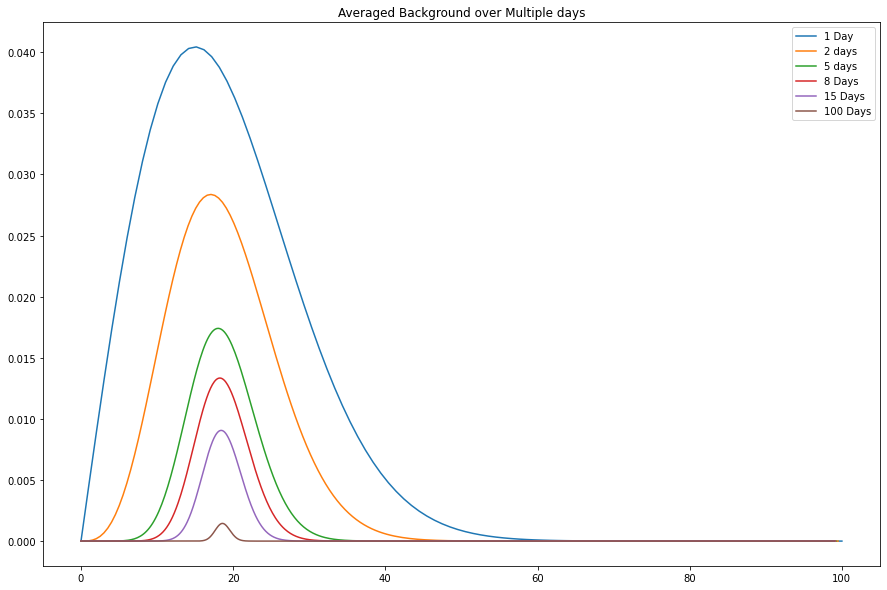

In [14]:
x = np.linspace(0, 100, 100)
bg = stats.rayleigh.pdf(x, scale = 15)

bg_2 = mult_conv(bg, 2)
bg_5 = mult_conv(bg, 5)
bg_8 = mult_conv(bg, 8)
bg_15 = mult_conv(bg, 15)
bg_100 = mult_conv(bg, 100)

plt.plot(x, bg, label = '1 Day')
plt.plot(np.linspace(0, len(bg_2), len(bg_2))/2, bg_2, label = '2 days')
plt.plot(np.linspace(0, len(bg_5), len(bg_5))/5, bg_5, label = '5 days')
plt.plot(np.linspace(0, len(bg_8), len(bg_8))/8, bg_8, label = '8 Days')
plt.plot(np.linspace(0, len(bg_15), len(bg_15))/15, bg_15, label = '15 Days')
plt.plot(np.linspace(0, len(bg_100), len(bg_100))/100, bg_100, label = '100 Days')
plt.title('Averaged Background over Multiple days')
plt.legend()
plt.show()

B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

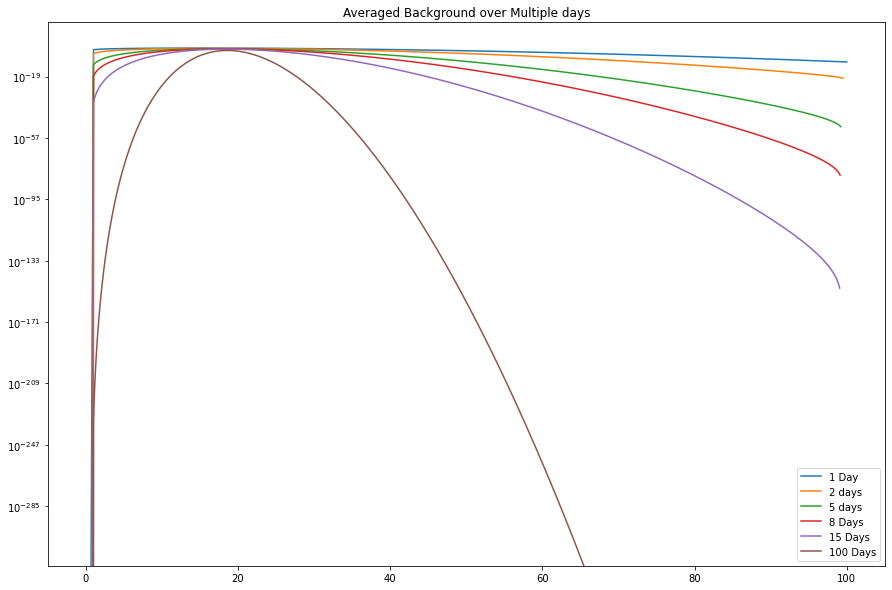

In [15]:
plt.semilogy(x, bg, label = '1 Day')
plt.semilogy(np.linspace(0, len(bg_2), len(bg_2))/2, bg_2, label = '2 days')
plt.semilogy(np.linspace(0, len(bg_5), len(bg_5))/5, bg_5, label = '5 days')
plt.semilogy(np.linspace(0, len(bg_8), len(bg_8))/8, bg_8, label = '8 Days')
plt.semilogy(np.linspace(0, len(bg_15), len(bg_15))/15, bg_15, label = '15 Days')
plt.semilogy(np.linspace(0, len(bg_100), len(bg_100))/100, bg_100, label = '100 Days')
plt.title('Averaged Background over Multiple days')
plt.legend()
plt.show()

On a semilog plot, it appears again that at about 100 days the distribution approaches a parabolic shape. This means that it is approaching a Gaussian distribution, which follows the central limit theorem. 

## Problem 3

Version 1 A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

What is the probability that the background gave me a signal as signal-like or more than the value I have?

Probability = $ \int_{15.5}^\infty pdf(x)dx $

In [57]:
width = 3
signal = 15.5
x = np.linspace(-15, 15, 1000)
background = stats.norm.pdf(x,loc = 0, scale =3)

probability = stats.norm.cdf(15.5, loc = 0, scale = width)
sigma = stats.norm.ppf(probability)

print('The probability of getting a signal of 15.5 or higher is: ' , 1 - probability, ' which corresponds to a sigma of: ' , sigma)

The probability of getting a signal of 15.5 or higher is:  1.1915285336172587e-07  which corresponds to a sigma of:  5.1666666666014045


Version 2: You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

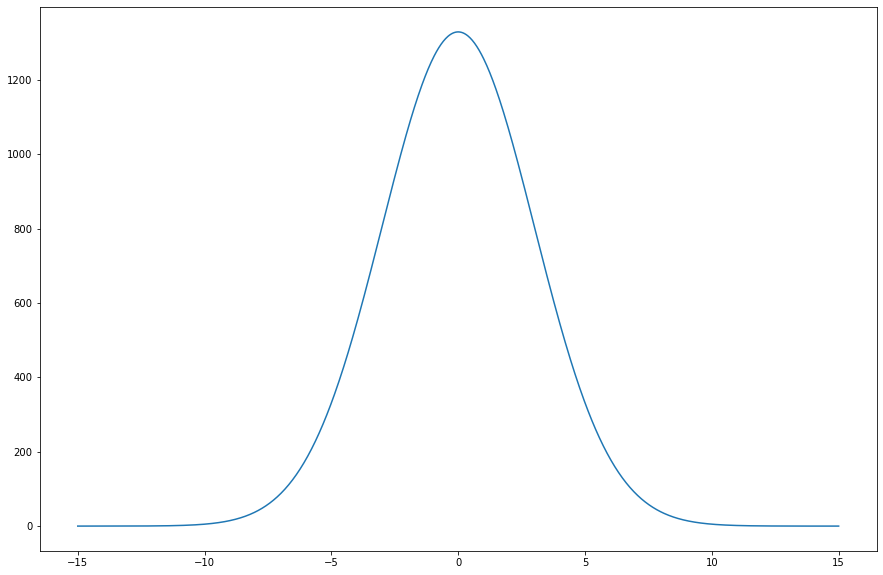

In [59]:
plt.plot(x, background*10000)
plt.show()

C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [60]:
probability = (1 - stats.norm.cdf(18, loc = 0, scale = 3))*10000
sigma = stats.norm.ppf(1 - probability)
print('Sigma value for 10k pixels at 18 = ', sigma)

Sigma value for 10k pixels at 18 =  4.267904750513104


## Problem 4

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

A) Calculate the signal required for a 5-sigma detection in Version 1

In [48]:
p_1 = stats.norm.cdf(5)
signal = stats.norm.ppf(p_1, scale=3)

print('In order to get a significant, 5 sigma, reading from 1 pixel we would need to measure ', signal)

In order to get a significant, 5 sigma, reading from 1 pixel we would need to measure  14.999999999910528


B) Calculate the signal required for a 5-sigma detection in Version 2

In [63]:
p_5 = 1 - stats.norm.cdf(5)
signal_10k = stats.norm.ppf(1 - p_10k/10000, scale = 3)

print('In order to get a significant, 5 sigma, reading from 10000 pixels we would need to measure', signal_10k)

In order to get a significant, 5 sigma, reading from 10000 pixels we would need to measure 19.651612460674965


C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

In [56]:
print(signal_10k/signal)

1.3101074973861455


With a trials factor of 10,000 the signal needs to be approximately 31% brighter to be significant enough for a discovery. 

D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

Starting with 10k, let's explore how the sensitivity changes with the trials factor:

In [66]:
p_5 = 1 - stats.norm.cdf(5)
signal_10k = stats.norm.ppf(1 - p_5/10000, scale = 3)
print('for trials factor of 10k: ', signal_10k)
signal_100k = stats.norm.ppf(1 - p_5/100000, scale = 3)
print('for trials factor of 100k: ', signal_100k)
signal_1m = stats.norm.ppf(1 - p_5/1000000, scale = 3)
print('for trials factor of 1 million: ', signal_1m)
signal_100m = stats.norm.ppf(1 - p_5/100000000, scale = 3)
print('for trials factor of 100 million: ', signal_100m)

for trials factor of 10k:  19.651612460674965
for trials factor of 100k:  20.65839675894015
for trials factor of 1 million:  21.62004430587802
for trials factor of 100 million:  23.426422490754568


Extra credit: If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.

As a result of the central limit theorem, I would think that with a higher trials factor we would see similar trends to the Gaussian sensitivity penalty. 